|   |  |
| ------------- | ------------- |
| Name | Umangkumar Patel  |
| Class  | CISC 432-01 Statistical Pattern Recognition  |
| Assignment|M5 HW1 Neural Network in Python|
| Description|Hand-Digits Recognition|
| Date |November 15, 2022|

### **Imports**

In [1]:
import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)
import cv2          # open cv python 
import matplotlib.pyplot as plt
import tensorflow as tf

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/digits/patel0.png
/kaggle/input/digits/patel1.png
/kaggle/input/digits/patel3.png
/kaggle/input/digits/patel2.png
/kaggle/input/digits/patel9.png
/kaggle/input/digits/patel6.png
/kaggle/input/digits/patel7.png
/kaggle/input/digits/patel5.png
/kaggle/input/digits/patel8.png
/kaggle/input/digits/patel4.png


### **Load Dataset**

In [2]:
mnist = tf.keras.datasets.mnist
(x_train, y_train),(x_test,y_test) = mnist.load_data()

11501568/11490434 [==============================] - 0s 0us/step


### **Normalize Data**

In [3]:
x_train = tf.keras.utils.normalize(x_train,axis=1)
x_test = tf.keras.utils.normalize(x_test,axis=1)

In [4]:
model = tf.keras.models.Sequential()
model.add(tf.keras.layers.Flatten(input_shape=(28,28)))
model.add(tf.keras.layers.Dense(128,activation='relu'))
model.add(tf.keras.layers.Dense(10,activation='softmax'))

2022-11-16 02:41:47.886717: I tensorflow/core/common_runtime/process_util.cc:146] Creating new thread pool with default inter op setting: 2. Tune using inter_op_parallelism_threads for best performance.


### **Compile Model**

In [5]:
model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])

### **Train**

In [6]:
model.fit(x_train,y_train,epochs=5)

2022-11-16 02:41:48.520483: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:185] None of the MLIR Optimization Passes are enabled (registered 2)


Epoch 1/5
1875/1875 [==============================] - 5s 2ms/step - loss: 0.3102 - accuracy: 0.9141
Epoch 2/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.1355 - accuracy: 0.9604
Epoch 3/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0925 - accuracy: 0.9731
Epoch 4/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0694 - accuracy: 0.9793
Epoch 5/5
1875/1875 [==============================] - 4s 2ms/step - loss: 0.0528 - accuracy: 0.9844


### **Save Model**

In [7]:
model.save('HandDigits.model')

2022-11-16 02:42:09.879703: W tensorflow/python/util/util.cc:348] Sets are not currently considered sequences, but this may change in the future, so consider avoiding using them.


### **Load the Trained Model**

In [8]:
hmodel = tf.keras.models.load_model('HandDigits.model')

### **Evaluate model on test data**

In [9]:
loss,accuracy = hmodel.evaluate(x_test,y_test)
print('Loss     - ', loss)
print('Accuracy - ', accuracy)

313/313 [==============================] - 1s 1ms/step - loss: 0.0896 - accuracy: 0.9720
Loss     -  0.08962278813123703
Accuracy -  0.972000002861023


### **Evaluate model on our own data**

Number: 0


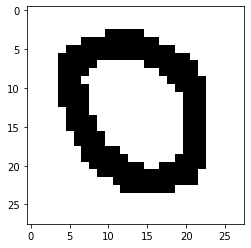

Number: 1


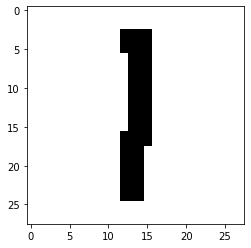

Number: 3


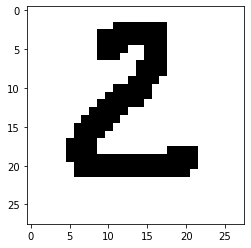

Number: 3


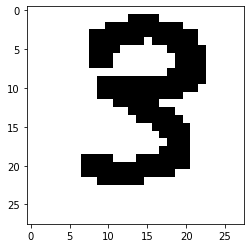

Number: 8


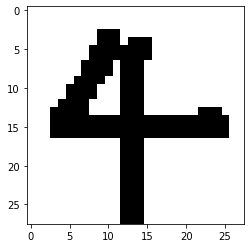

Number: 3


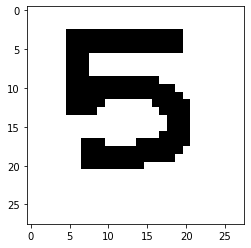

Number: 6


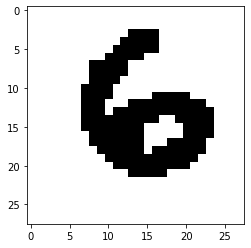

Number: 8


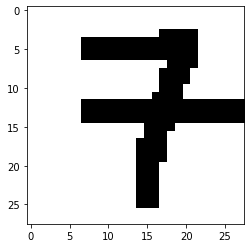

Number: 8


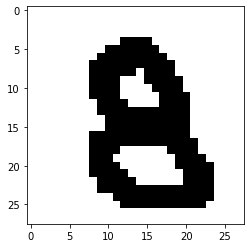

Number: 9


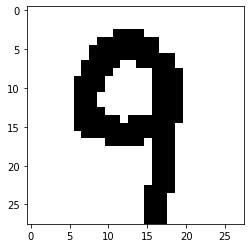

In [10]:
image_number = 0
# Load the files first
while os.path.isfile(f"/kaggle/input/digits/patel{image_number}.png"):
    try:
        img = cv2.imread(f"/kaggle/input/digits/patel{image_number}.png")[:,:,0]
        img = np.invert(np.array([img]))
        prediction = hmodel.predict(img)
        print(f"Number: {np.argmax(prediction)}")
        plt.imshow(img[0],cmap=plt.cm.binary)
        plt.show()
    except:
        print('Error')
    finally:
        image_number += 1